<a href="https://colab.research.google.com/github/GopikaPavithran/Prodigy-Internship/blob/main/Prodigy_Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Mall Customer Segmentation**

# **Importing Required Libraries**

In [205]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import normalize
import scipy.cluster.hierarchy as shc
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pickle

# **Dataset Loading**

In [206]:
df=pd.read_csv('/content/drive/MyDrive/Prodigy Internship Data/Task 2 - Customer Segmentation/Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


# **Exploratory Data Analysis**

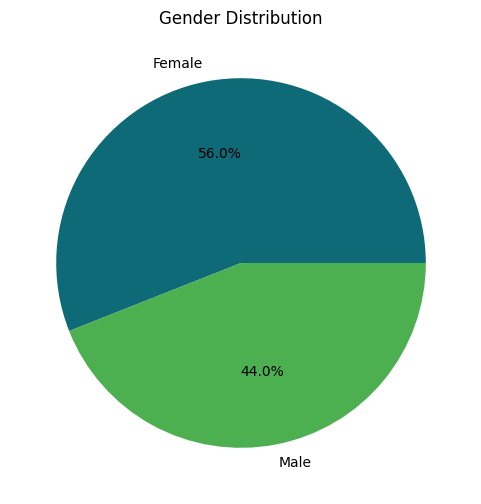

In [208]:
gender_counts=df['Gender'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['#0E6A77','#4CAF50'])
plt.title('Gender Distribution')
plt.show()

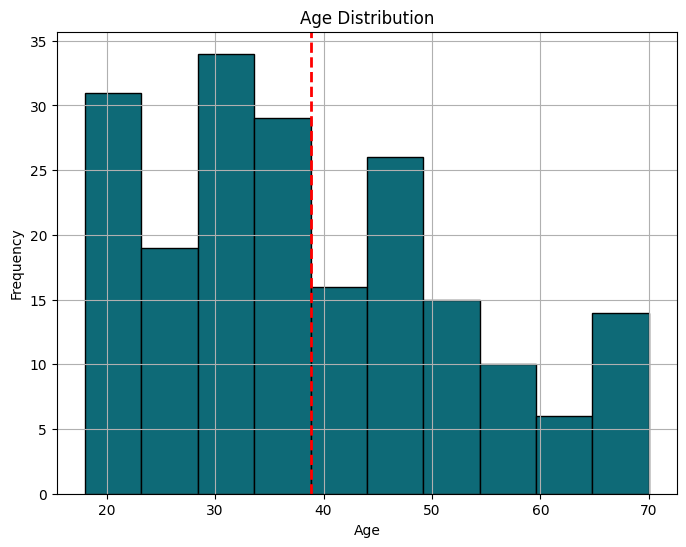

In [209]:
plt.figure(figsize=(8,6))
plt.hist(df['Age'], bins=10, color='#0E6A77', edgecolor='black')
plt.axvline(df['Age'].mean(), color='red', linestyle='dashed', linewidth=2)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

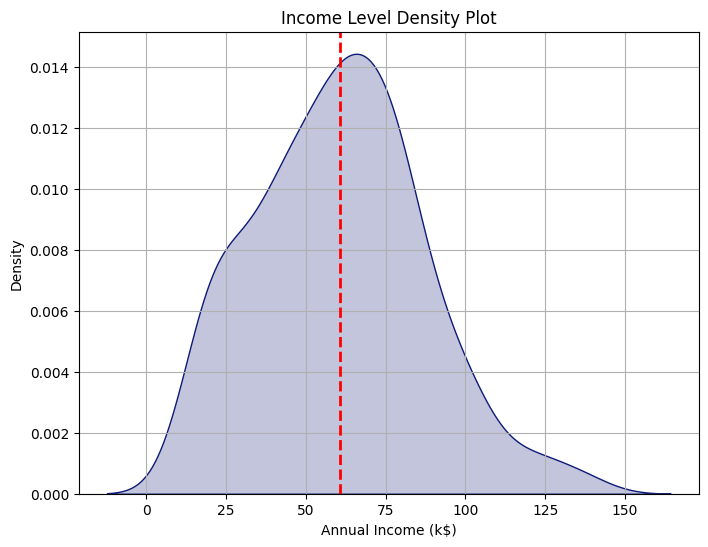

In [210]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df['Annual Income (k$)'], shade=True, color='#0E1A77')
warnings.simplefilter(action='ignore',category=FutureWarning)
plt.axvline(df['Annual Income (k$)'].mean(), color='red', linestyle='dashed', linewidth=2)
plt.title('Income Level Density Plot')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Density')
plt.grid(True)
plt.show()

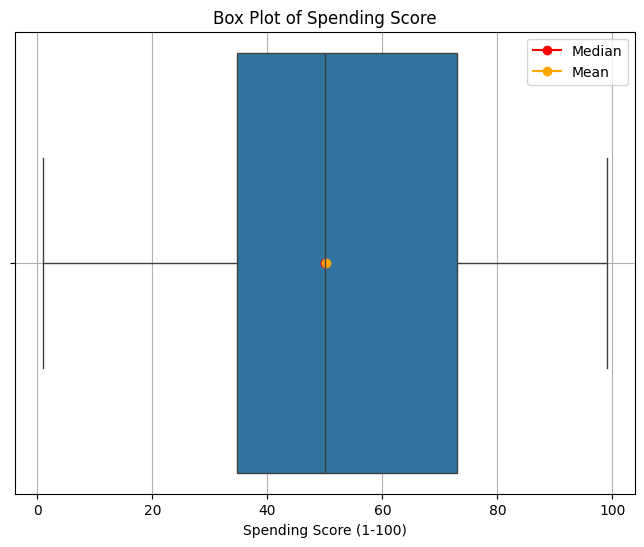

In [211]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Spending Score (1-100)'])
plt.title('Box Plot of Spending Score')
plt.xlabel('Spending Score (1-100)')
median=df['Spending Score (1-100)'].median()
mean=df['Spending Score (1-100)'].mean()
plt.plot(median,0,marker='o',color='red',label='Median')
plt.plot(mean,0,marker='o',color='orange',label='Mean')
plt.legend()
plt.grid(True)
plt.show()

No Outliers

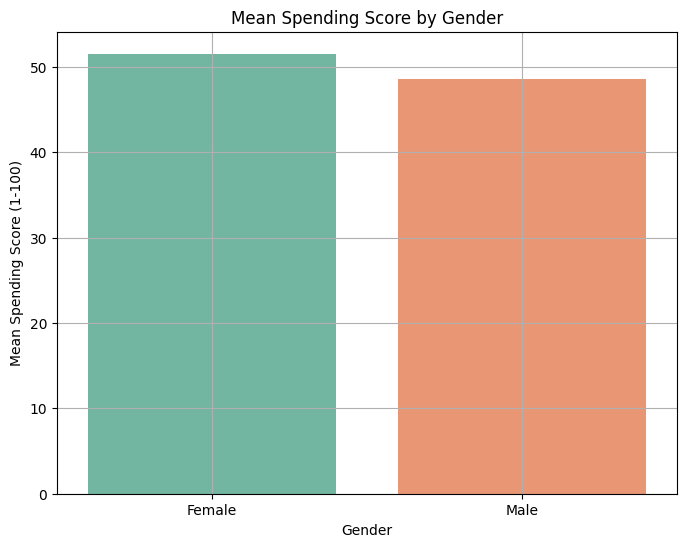

In [212]:
mean_scores=df.groupby('Gender')['Spending Score (1-100)'].mean().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(x='Gender', y='Spending Score (1-100)', data=mean_scores, palette='Set2')
plt.title('Mean Spending Score by Gender')
plt.xlabel('Gender')
plt.ylabel('Mean Spending Score (1-100)')
plt.grid(True)
plt.show()

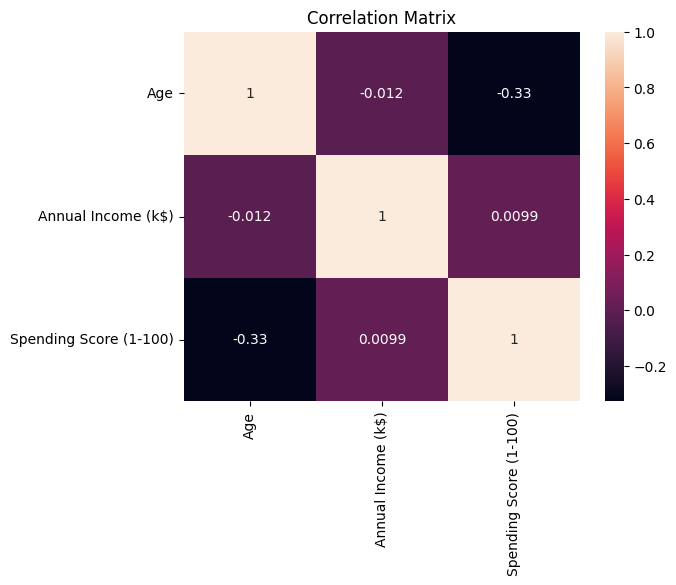

In [213]:
num_col=df.select_dtypes(include=['int']).drop('CustomerID',axis=1)
corr_matrix=num_col.corr()
sns.heatmap(corr_matrix,annot=True)
plt.title('Correlation Matrix')
plt.show()

# **Preprocessing**

In [214]:
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])

In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Gender                  200 non-null    int64
 2   Age                     200 non-null    int64
 3   Annual Income (k$)      200 non-null    int64
 4   Spending Score (1-100)  200 non-null    int64
dtypes: int64(5)
memory usage: 7.9 KB


In [216]:
X=df.drop('CustomerID',axis=1)

In [217]:
X_scaled=normalize(X)
X_scaled

array([[0.02178034, 0.4138265 , 0.32670513, 0.84943334],
       [0.01176226, 0.24700755, 0.17643396, 0.9527434 ],
       [0.        , 0.76028592, 0.60822874, 0.22808578],
       [0.        , 0.28069661, 0.19526721, 0.93972343],
       [0.        , 0.5806832 , 0.31843918, 0.74926865],
       [0.        , 0.27185366, 0.21006874, 0.93913083],
       [0.        , 0.87913063, 0.45212432, 0.15070811],
       [0.        , 0.23366214, 0.18286603, 0.95496702],
       [0.01496208, 0.95757323, 0.28427955, 0.04488625],
       [0.        , 0.37368855, 0.23666942, 0.89685253],
       [0.01407613, 0.94310088, 0.26744652, 0.19706586],
       [0.        , 0.3279921 , 0.17805285, 0.92774908],
       [0.        , 0.91832409, 0.31666348, 0.23749761],
       [0.        , 0.28882142, 0.24068452, 0.92663539],
       [0.02270968, 0.84025832, 0.45419368, 0.29522589],
       [0.01184615, 0.26061522, 0.23692293, 0.93584556],
       [0.        , 0.65094455, 0.39056673, 0.65094455],
       [0.01387017, 0.27740345,

In [218]:
wcss=[]
for i in range(1,11):
  km=KMeans(n_clusters=i,random_state=1)
  km.fit(X_scaled)
  wcss.append(km.inertia_)
wcss

[25.464512344194336,
 15.234773265870414,
 11.536364595326944,
 5.645081583657898,
 3.7152697048866603,
 3.3372946523250415,
 2.717713558385168,
 2.2798641906422734,
 2.0386476491326735,
 1.9042890530415786]

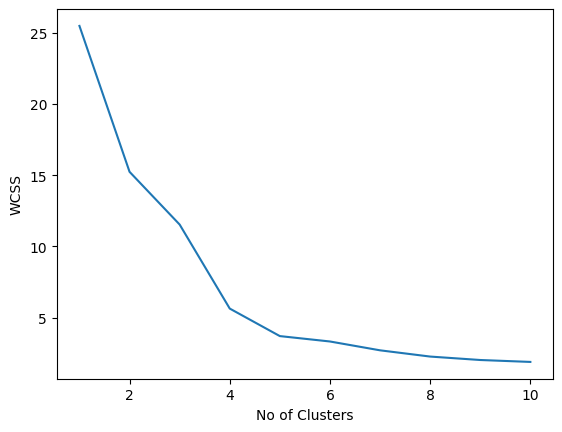

In [219]:
plt.xlabel('No of Clusters')
plt.ylabel('WCSS')
plt.plot(range(1,11),wcss)

# **Model Development**

In [220]:
km=KMeans(n_clusters=5,random_state=1)
y=km.fit_predict(X_scaled)
y

array([2, 2, 4, 2, 2, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 0, 2, 4, 2, 0, 2,
       4, 2, 4, 2, 0, 2, 0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 0, 2, 4, 2, 0, 2,
       0, 2, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 1, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

In [221]:
df['Cluster']=y
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,1,19,15,39,2
1,2,1,21,15,81,2
2,3,0,20,16,6,4
3,4,0,23,16,77,2
4,5,0,31,17,40,2
...,...,...,...,...,...,...
195,196,0,35,120,79,1
196,197,0,45,126,28,3
197,198,1,32,126,74,1
198,199,1,32,137,18,3


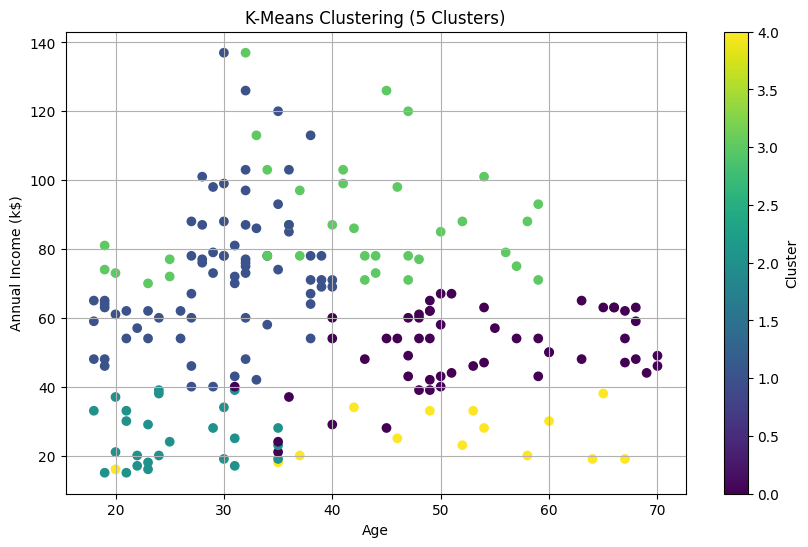

In [222]:
plt.figure(figsize=(10,6))
plt.scatter(df['Age'],df['Annual Income (k$)'],c=df['Cluster'], cmap='viridis', label='Clusters')
plt.title('K-Means Clustering (5 Clusters)')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

In [223]:
silhouette_avg=silhouette_score(X_scaled,df['Cluster'])
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.5428984705457579


# **Exporting the Model**

In [224]:
pickle.dump(km,open('mallcustomer_model.sav','wb'))
pickle.dump(normalize,open('mallcustomer_scaler.sav','wb'))